In [1454]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import pi
import matplotlib.colors as mcolors
from scipy import stats

from csv import reader
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pysankey import sankey

from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f
from scipy.spatial import distance
from sklearn import preprocessing

# Get the data
characters = open('star-wars-dataset/characters.csv')
df_characters = pd.read_csv('star-wars-dataset/characters.csv')
planets = open('star-wars-dataset/planets.csv')
df_planets = pd.read_csv('star-wars-dataset/planets.csv')
species = open('star-wars-dataset/species.csv')
df_species = pd.read_csv('star-wars-dataset/species.csv')
starships = open('star-wars-dataset/starships.csv')
df_starships = pd.read_csv('star-wars-dataset/starships.csv')
vehicles = open('star-wars-dataset/vehicles.csv')
df_vehicles = pd.read_csv('star-wars-dataset/vehicles.csv')


sns.set()

In [1455]:
df_characters.head(10)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human
5,Owen Lars,178.0,120,"brown, grey",light,blue,52BBY,male,Tatooine,Human
6,Beru Whitesun lars,165.0,75,brown,light,blue,47BBY,female,Tatooine,Human
7,R5-D4,97.0,32,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
8,Biggs Darklighter,183.0,84,black,light,brown,24BBY,male,Tatooine,Human
9,Obi-Wan Kenobi,182.0,77,"auburn, white",fair,blue-gray,57BBY,male,Stewjon,Human


In [1456]:
df_planets.head(10)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
1,Yavin IV,24.0,4818.0,10200.0,"temperate, tropical",1 standard,"jungle, rainforests",8.0,1.000000e+03
2,Hoth,23.0,549.0,7200.0,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100.0,NaN
3,Dagobah,23.0,341.0,8900.0,murky,NaN,"swamp, jungles",8.0,NaN
4,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06
5,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07
6,Naboo,26.0,312.0,12120.0,temperate,1 standard,"grassy hills, swamps, forests, mountains",12.0,4.500000e+09
7,Coruscant,24.0,368.0,12240.0,temperate,1 standard,"cityscape, mountains",NaN,1.000000e+12
8,Kamino,27.0,463.0,19720.0,temperate,1 standard,ocean,100.0,1.000000e+09
9,Geonosis,30.0,256.0,11370.0,"temperate, arid",0.9 standard,"rock, desert, mountain, barren",5.0,1.000000e+11


In [1457]:
df_species.head(10)

,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,language,homeworld
0,Hutt,gastropod,sentient,300.0,"green, brown, tan",NaN,"yellow, red",1000,Huttese,Nal Hutta
1,Yoda's species,mammal,sentient,66.0,"green, yellow","brown, white","brown, green, yellow",900,Galactic basic,NaN
2,Trandoshan,reptile,sentient,200.0,"brown, green",none,"yellow, orange",NaN,Dosh,Trandosha
3,Mon Calamari,amphibian,sentient,160.0,"red, blue, brown, magenta",none,yellow,NaN,Mon Calamarian,Mon Cala
4,Ewok,mammal,sentient,100.0,brown,"white, brown, black","orange, brown",NaN,Ewokese,Endor
5,Sullustan,mammal,sentient,180.0,pale,none,black,NaN,Sullutese,Sullust
6,Neimodian,NaN,sentient,180.0,"grey, green",none,"red, pink",NaN,Neimoidia,Cato Neimoidia
7,Gungan,amphibian,sentient,190.0,"brown, green",none,orange,NaN,Gungan basic,Naboo
8,Toydarian,mammal,sentient,120.0,"blue, green, grey",none,yellow,91,Toydarian,Toydaria
9,Dug,mammal,sentient,100.0,"brown, purple, grey, red",none,"yellow, blue",NaN,Dugese,Malastare


In [1458]:
df_starships.head(10)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class
0,Executor,Executor-class star dreadnought,"Kuat Drive Yards, Fondor Shipyards",1.143350e+09,19000,NaN,279144.0,38000.0,2.500000e+08,6 years,2.0,40.0,Star dreadnought
1,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",2.400000e+05,38,1000,5.0,75.0,1.800000e+05,1 month,1.0,70.0,landing craft
2,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1.000000e+12,120000,NaN,342953.0,843342.0,1.000000e+12,3 years,4.0,10.0,Deep Space Mobile Battlestation
3,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,1.000000e+05,34.37,1050,4.0,6.0,1.000000e+05,2 months,0.5,75.0,Light freighter
4,Y-wing,BTL Y-wing,Koensayr Manufacturing,1.349990e+05,14,1000km,2.0,0.0,1.100000e+02,1 week,1.0,80.0,assault starfighter
5,X-wing,T-65 X-wing,Incom Corporation,1.499990e+05,12.5,1050,1.0,0.0,1.100000e+02,1 week,1.0,100.0,Starfighter
6,TIE Advanced x1,Twin Ion Engine Advanced x1,Sienar Fleet Systems,NaN,9.2,1200,1.0,0.0,1.500000e+02,5 days,1.0,105.0,Starfighter
7,Slave 1,Firespray-31-class patrol and attack,Kuat Systems Engineering,NaN,21.5,1000,1.0,6.0,7.000000e+04,1 month,3.0,70.0,Patrol craft
8,Imperial shuttle,Lambda-class T-4a shuttle,Sienar Fleet Systems,2.400000e+05,20,850,6.0,20.0,8.000000e+04,2 months,1.0,50.0,Armed government transport
9,EF76 Nebulon-B escort frigate,EF76 Nebulon-B escort frigate,Kuat Drive Yards,8.500000e+06,300,800,854.0,75.0,6.000000e+06,2 years,2.0,40.0,Escort ship


In [1459]:
df_vehicles.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000.0,36.8,30.0,46,30.0,50000,2 months,wheeled
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500.0,10.4,1200.0,1,1.0,50,0,repulsorcraft
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550.0,3.4,250.0,1,1.0,5,NaN,repulsorcraft
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,NaN,6.4,1200.0,1,0.0,65,2 days,starfighter
4,Snowspeeder,t-47 airspeeder,Incom corporation,NaN,4.5,650.0,2,0.0,10,none,airspeeder


In [1460]:
df_species['language'].unique()

array(['Huttese', 'Galactic basic', 'Dosh', 'Mon Calamarian', 'Ewokese',
       'Sullutese', 'Neimoidia', 'Gungan basic', 'Toydarian', 'Dugese',
       "Twi'leki", 'Aleena', 'vulpterish', 'Xextese', 'Tundan', 'Cerean',
       'Nautila', 'Zabraki', nan, 'Iktotchese', 'Quermian', 'Kel Dor',
       'Chagria', 'Geonosian', 'Mirialan', 'Clawdite', 'besalisk',
       'Kaminoan', 'Skakoan', 'Muun', 'Togruti', 'Kaleesh', 'Utapese',
       'Shyriiwook', 'Galactic Basic'], dtype=object)

## Similarity to Earth analysis

In [1461]:
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
1,Yavin IV,24.0,4818.0,10200.0,"temperate, tropical",1 standard,"jungle, rainforests",8.0,1.000000e+03
2,Hoth,23.0,549.0,7200.0,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100.0,NaN
3,Dagobah,23.0,341.0,8900.0,murky,NaN,"swamp, jungles",8.0,NaN
4,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06


In [1462]:
# Sort in alphabetical order by the name of the planets
df_planets = df_planets.sort_values('name', ascending=True)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
36,Aleen Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06
24,Bestine IV,26.0,680.0,6400.0,temperate,NaN,"rocky islands, oceans",98.0,6.200000e+07
16,Cato Neimoidia,25.0,278.0,0.0,"temperate, moist",1 standard,"mountains, fields, forests, rock arches",NaN,1.000000e+07


In [1463]:
# Reset index of the data frame
df_planets = df_planets.reset_index(drop=True)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09
1,Aleen Minor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06
3,Bestine IV,26.0,680.0,6400.0,temperate,NaN,"rocky islands, oceans",98.0,6.200000e+07
4,Cato Neimoidia,25.0,278.0,0.0,"temperate, moist",1 standard,"mountains, fields, forests, rock arches",NaN,1.000000e+07


In [1464]:
df_planets['name'].unique()

array(['Alderaan', 'Aleen Minor', 'Bespin', 'Bestine IV',
       'Cato Neimoidia', 'Cerea', 'Champala', 'Chandrila', 'Concord Dawn',
       'Corellia', 'Coruscant', 'Dagobah', 'Dantooine', 'Dathomir',
       'Dorin', 'Endor', 'Eriadu', 'Felucia', 'Geonosis', 'Glee Anselm',
       'Haruun Kal', 'Hoth', 'Iktotch', 'Iridonia', 'Jakku', 'Kalee',
       'Kamino', 'Kashyyyk', 'Malastare', 'Mirial', 'Mon Cala',
       'Mustafar', 'Muunilinst', 'Mygeeto', 'Naboo', 'Nal Hutta', 'Ojom',
       'Ord Mantell', 'Polis Massa', 'Quermia', 'Rodia', 'Ryloth',
       'Saleucami', 'Serenno', 'Shili', 'Skako', 'Socorro', 'Stewjon',
       'Sullust', 'Tatooine', 'Tholoth', 'Toydaria', 'Trandosha',
       'Troiken', 'Tund', 'Umbara', 'Utapau', 'Vulpter', 'Yavin IV',
       'Zolan', nan], dtype=object)

In [1465]:
df_planets.dropna(inplace=True)

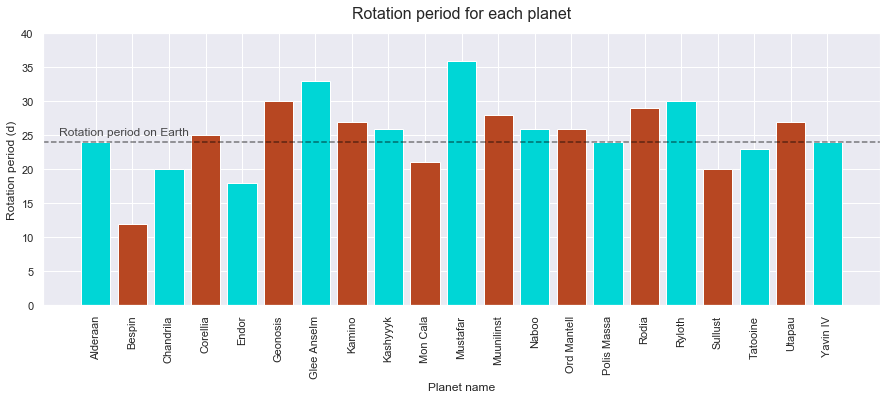

In [1466]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['rotation_period'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Rotation period for each planet', fontsize=16, pad=15)
plt.ylabel('Rotation period (d)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 40)
ax.axhline(y=24, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=-1, y=25, s='Rotation period on Earth', alpha=0.7, color='black');

In [1467]:
# Data normalization trial
#x = df_planets.rotation_period.values #returns a numpy array
#x = x.reshape(1, -1)
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df_planets = pd.DataFrame(x_scaled)
#x = df_planets.rotation_period.values #returns a numpy array
#x = x.reshape(1, -1)
#pd.DataFrame(min_max_scaler.fit_transform(x), columns=df_planets.columns, index=df_planets.index)

In [1468]:
df_planets['rotation_period_diff'] = abs(df_planets['rotation_period'] - 24)
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0.0
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12.0
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4.0
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1.0
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6.0


In [1469]:
#df_planets['rotation_period_diff'] = df_planets['rotation_period_diff'].apply(np.int64) # This works as well, leaving here for a learning purpose
df_planets['rotation_period_diff'] = df_planets['rotation_period_diff'].astype('int64')
df_planets.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6


In [1470]:
df_planets['rotation_period_norm']=(df_planets['rotation_period_diff']-df_planets['rotation_period_diff'].min())/(df_planets['rotation_period_diff'].max()-df_planets['rotation_period_diff'].min())
df_planets.head(20)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,rotation_period_diff,rotation_period_norm
0,Alderaan,24.0,364.0,12500.0,temperate,1 standard,"grasslands, mountains",40.0,2.000000e+09,0,0.000000
2,Bespin,12.0,5110.0,118000.0,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0.0,6.000000e+06,12,1.000000
7,Chandrila,20.0,368.0,13500.0,temperate,1,"plains, forests",40.0,1.200000e+09,4,0.333333
9,Corellia,25.0,329.0,11000.0,temperate,1 standard,"plains, urban, hills, forests",70.0,3.000000e+09,1,0.083333
15,Endor,18.0,402.0,4900.0,temperate,0.85 standard,"forests, mountains, lakes",8.0,3.000000e+07,6,0.500000
18,Geonosis,30.0,256.0,11370.0,"temperate, arid",0.9 standard,"rock, desert, mountain, barren",5.0,1.000000e+11,6,0.500000
19,Glee Anselm,33.0,206.0,15600.0,"tropical, temperate",1,"lakes, islands, swamps, seas",80.0,5.000000e+08,9,0.750000
26,Kamino,27.0,463.0,19720.0,temperate,1 standard,ocean,100.0,1.000000e+09,3,0.250000
27,Kashyyyk,26.0,381.0,12765.0,tropical,1 standard,"jungle, forests, lakes, rivers",60.0,4.500000e+07,2,0.166667
30,Mon Cala,21.0,398.0,11030.0,temperate,1,"oceans, reefs, islands",100.0,2.700000e+10,3,0.250000


In [ ]:
df_planets.dtypes

In [ ]:
df_planets.head()

In [ ]:
print(min(df_planets['rotation_period_diff']))

In [ ]:
12/10

In [ ]:
df_planets.dtypes

In [ ]:
print(0.0)
print(1.2*1)
print(1.2*2)
print(1.2*3)
print(1.2*4)
print(1.2*5)
print(1.2*6)
print(1.2*7)
print(1.2*8)
print(1.2*9)
print(1.2*10)

In [ ]:
df_planets['rotation_period_diff'].unique()

In [ ]:
df_planets['rotation_period_pkt'] = df_planets['rotation_period_diff'].apply(lambda x: 10 if x in (0,1) else
                                                                       9 if x == 2 else
                                                                       8 if x == 3 else
                                                                       7 if x == 4 else
                                                                       6 if x == 5 else
                                                                       5 if x == 6 else
                                                                       3 if x == 9 else
                                                                       1)

In [ ]:
df_planets.head()

In [ ]:
df_planets['rotation_period_pkt'].unique()

In [ ]:
print(max(df_planets['orbital_period']))

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['orbital_period'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Orbital period for each planet', fontsize=16, pad=15)
plt.ylabel('Orbital period (d)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 5200)
ax.axhline(y=365, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=600, s='Orbital period on Earth', alpha=0.7, color='black');

In [ ]:
df_planets['orbital_period_diff'] = abs(df_planets['orbital_period'] - 365)
df_planets.head()

In [ ]:
df_planets['orbital_period_diff'].unique()

In [ ]:
df_planets.dtypes

In [ ]:
#df_planets['orbital_period_pkt'] = df_planets['orbital_period_diff'].apply(lambda x: )

In [ ]:
print(max(df_planets['diameter']))

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['diameter'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Orbital period for each planet', fontsize=16, pad=15)
plt.ylabel('Orbital period (d)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 120000)
ax.axhline(y=12742, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=18000, s='Orbital period on Earth', alpha=0.7, color='black');

In [ ]:
df_planets['diameter_diff'] = abs(df_planets['diameter'] - 12742)
df_planets.head()

In [ ]:
df_planets['diameter_diff'].unique()

In [ ]:
print(max(df_planets['surface_water']))

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['surface_water'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Water surface for each planet', fontsize=16, pad=15)
plt.ylabel('Water surface (%)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 100)
ax.axhline(y=71, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=75, s='Water surface of Earth', alpha=0.7, color='black');

In [ ]:
df_planets['surface_water_diff'] = abs(df_planets['surface_water'] - 71)
df_planets.head()

In [ ]:
df_planets['surface_water_diff'].unique()

In [ ]:
print(max(df_planets['population']))

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_planets['name'],
    height=df_planets['population'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Population for each planet', fontsize=16, pad=15)
plt.ylabel('Population (#)')
plt.xlabel('Planet name')
plt.xticks(rotation=90)
plt.ylim(0, 100000000000)
ax.axhline(y=7700000000, linestyle='dashed', alpha=0.5, color='black')
ax.text(x=18, y=10000000000, s='Population of Earth', alpha=0.7, color='black');

In [ ]:
df_planets['population_diff'] = abs(df_planets['population'] - 7700000000)
df_planets.head()

In [ ]:
df_planets['gravity'].unique()

In [ ]:
df_planets['gravity'] = df_planets['gravity'].apply(lambda x: '1' if '1 standard' == x else
                                                   '1' if '1' == x else
                                                   '1.5' if '1.5 (surface), 1 standard (Cloud City)' == x else
                                                   '0.85' if '0.85 standard' == x else
                                                   '0.9' if '0.9 standard' == x else
                                                   '0.56' if '0.56 standard' == x else
                                                   '0')

In [ ]:
df_planets.dtypes

In [ ]:
#df_planets['gravity'].astype(str).astype(int)

In [ ]:
df_planets.dtypes

In [ ]:
df_planets['gravity'].unique

## The most common color of eyes/hair

In [ ]:
# Show the data frame
df_species.head(38)

In [ ]:
# Check size of the data frame
df_species.shape

### Hair type

In [ ]:
# Show values for hair color
df_species['hair_colors'].unique()

In [ ]:
df_species['hair_colors'].nunique()

In [ ]:
df_species['hair_colors'].value_counts()

In [ ]:
# Clean unique list
hair_colors_list = df_species['hair_colors'].unique()
hair_colors_list = [x for x in hair_colors_list if str(x) != 'nan']
print(hair_colors_list)

In [ ]:
# Split colors
hair_colors_list_splitted = []
for color in hair_colors_list:
    hair_colors_list_splitted.extend(color.split(', '))
print(hair_colors_list_splitted)

In [ ]:
# Rename list
hair_colors_list = hair_colors_list_splitted

In [ ]:
# Get unique colors only
hair_colors_list = list(set(hair_colors_list))
print(hair_colors_list)

In [ ]:
# Get the number of hair colors in races (exp. yellow color can be in 3 races)
for each_color in hair_colors_list:
    print(each_color, df_species.hair_colors.str.count(each_color).sum())

In [ ]:
# Bar chart with the number of species with particular color of hair
value = [3, 1, 2, 6, 2, 26, 5]
index = ['white', 'blonde', 'blond', 'black', 'red', 'none', 'brown']
df_hair = pd.DataFrame({'species_number': value, 'hair': index}).sort_values(by='species_number', ascending=False)
df_hair.head()

In [ ]:
# Plot bar chart
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_hair['hair'],
    height=df_hair['species_number'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Number of species by hair type', fontsize=16, pad=15)
plt.ylabel('Number of species')
plt.xlabel('Hair type')
plt.xticks(rotation=90)
plt.ylim(0, 30)

#TODO:
* Change the font sizes
* Check if there is a difference between `blond` and `blonde`

### Eyes color

In [ ]:
df_species.head(38)

In [ ]:
# Show values for hair color
df_species['eye_colors'].unique()

In [ ]:
# Clean unique list
eye_colors_list = df_species['eye_colors'].unique()
eye_colors_list = [x for x in eye_colors_list if str(x) != 'nan']
print(eye_colors_list)

In [ ]:
# Split colors
eye_colors_list_splitted = []
for eye_color in eye_colors_list:
    eye_colors_list_splitted.extend(eye_color.split(', '))
print(eye_colors_list_splitted)

In [ ]:
# Rename list
eye_colors_list = eye_colors_list_splitted

In [ ]:
# Get unique colors only
eye_colors_list = list(set(eye_colors_list))
print(eye_colors_list)

In [ ]:
# Get the number of eye colors in races (exp. brown color can be in 3 races)
for each_eye_color in eye_colors_list:
    print(each_eye_color, df_species.eye_colors.str.count(each_eye_color).sum())

In [ ]:
# Bar chart with the number of species with particular color of eyes
species_number = [9, 9, 8, 1, 1, 2, 7, 1, 1, 14, 6, 5, 3, 1]
eye_color = ['orange', 'black', 'blue', 'grey', 'amber', 'pink', 'brown', 'silver', 'indigo', 'yellow', 'green', 'red', 'hazel', 'golden']
df_eyes = pd.DataFrame({'species_number': species_number, 'eye_color': eye_color}).sort_values(by='species_number', ascending=False)
df_eyes = df_eyes.reset_index(drop=True)
df_eyes.head()

In [ ]:
# Plot bar chart
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_eyes['eye_color'],
    height=df_eyes['species_number'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Number of species by eye color', fontsize=16, pad=15)
plt.ylabel('Number of species')
plt.xlabel('Eye color')
plt.xticks(rotation=90)
plt.ylim(0, 30)

## Similarity in distribution of certain eyes/hair color for characters in races to distribution for humans

## Distribution of races in each world

In [ ]:
df_species.head(10)

In [ ]:
df_species['name'].nunique()

In [ ]:
df_species['homeworld'].nunique()

In [ ]:
df_species.groupby(['name', 'homeworld']).sum()

## Starships

In [ ]:
df_starships.head(38)

In [ ]:
df_starships.shape

In [ ]:
df_starships['manufacturer'].nunique()

In [ ]:
df_starships['name'].nunique()

In [ ]:
df_starships['max_atmosphering_speed'].unique()

In [ ]:
df_starships['max_atmosphering_speed'] = df_starships['max_atmosphering_speed'].str.replace(r'\D+', '')

In [ ]:
df_starships.head()

In [ ]:
df_starships['max_atmosphering_speed'].unique()

In [ ]:
df_starships.head()

In [ ]:
print(type(df_starships['max_atmosphering_speed'][0]))

In [ ]:
df_starships = df_starships.dropna(subset=['max_atmosphering_speed'])

In [ ]:
df_starships.max_atmosphering_speed = df_starships.max_atmosphering_speed.astype(int)

In [ ]:
df_starships.head(38)

In [ ]:
print(type(df_starships['max_atmosphering_speed'][1]))

In [ ]:
df_starships = df_starships.sort_values(by='max_atmosphering_speed', ascending=False)

In [ ]:
df_starships.head(38)

In [ ]:
# Plot bar chart
fig, ax = plt.subplots(figsize=(15,5))

plt.bar(
    x=df_starships['name'],
    height=df_starships['max_atmosphering_speed'],
    color=['#00D6D6', '#b74722'],
)
plt.title('Max speed of starships', fontsize=16, pad=30)
plt.ylabel('Max speed')
plt.xlabel('Names of starships')
plt.xticks(rotation=90)
plt.ylim(0,)